1.	Usando la herramienta de grabación de tu teléfono móvil, captura un breve mensaje (de 15 a 20 segundos) en el que digas tu nombre, así como la fecha y el lugar en donde te encuentras. Repite esta misma operación varias veces y en diversos lugares. Busca un lugar en donde la señal grabada se pueda contaminar fácilmente con ruido (cerca de una avenida, música de fondo, ruidos mecánicos, lluvia, entre otros).
2.	Utilizando los conocimientos sobre el análisis de componentes, elabora un modelo de aprendizaje automático que pueda filtrar la señal de entrada y separar el mensaje (sonido de la voz) del ruido de fondo. Realiza las pruebas necesarias para evaluar la calidad de tu modelo.
3.	Con las muestras de ruido obtenidas después de ejecutar el paso 2, construye y entrena un mapa autoorganizado de características que permita determinar a qué grupo pertenece y, por ende, te facilite determinar en qué lugar se realizó la captura original. Toma en cuenta que debes preprocesar dichas señales para que puedan usarse por la red neuronal. Realiza las pruebas necesarias para evaluar la calidad de tu modelo.
4.	Agrupa ambos modelos en un solo programa de Python, genera nuevas muestras en condiciones parecidas a las originales y evalúa el funcionamiento completo de tu propuesta. ¿Los resultados fueron los adecuados?
5.	Elabora un informe en el que describas los pasos desarrollados para la realización de la actividad 

In [1]:
from IPython.display import Audio 
from IPython.core.display import display
from minisom import MiniSom
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

C:\Users\leona\AppData\Local\Temp\ipykernel_17500\3945950864.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [2]:
y, sr = librosa.load('../Audios/Prueba_1.wav')
y_2, sr_2 = librosa.load('../Audios/Prueba_2.wav')
y_3, sr_3 = librosa.load('../Audios/Prueba_3.wav')

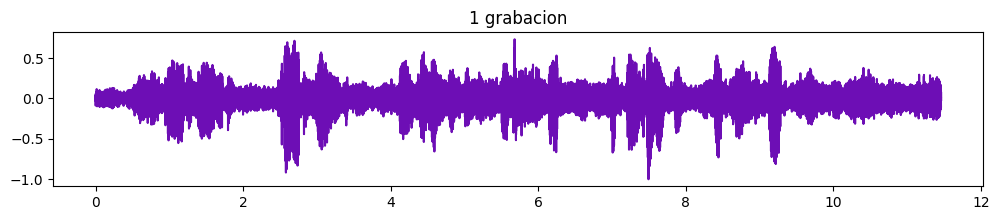

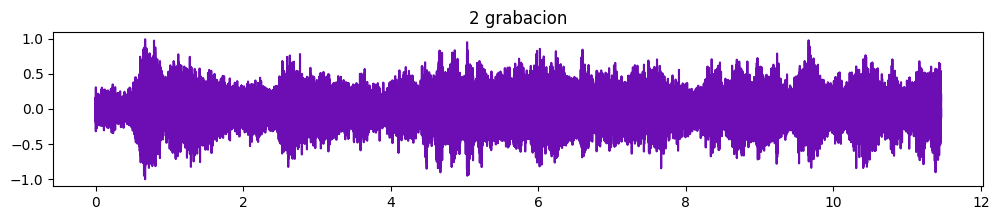

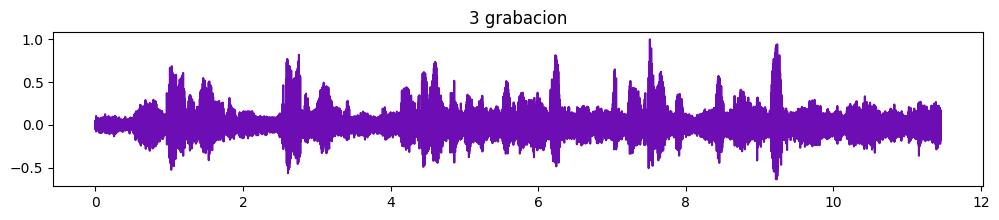

In [3]:
fs = sr
fs_2 = sr_2
fs_3 = sr_3
timing = np.linspace(0, len(y)/fs, num=len(y))
timing_2 = np.linspace(0, len(y_2)/fs_2, num=len(y_2))
timing_3 = np.linspace(0, len(y_3)/fs_3, num=len(y_3))

plt.figure(figsize=(12,2))
plt.title('1 grabacion')
plt.plot(timing,y, c="#6d0eb5")

plt.figure(figsize=(12,2))
plt.title('2 grabacion')
plt.plot(timing_2,y_2, c="#6d0eb5")

plt.figure(figsize=(12,2))
plt.title('3 grabacion')
plt.plot(timing_3,y_3, c="#6d0eb5")

In [ ]:
X = list(zip(y, y_2,y_3))
# Initialize FastICA with n_components=3
ica = FastICA(n_components=3)
# Run the FastICA algorithm using fit_transform on dataset X
ica_result = ica.fit_transform(X)
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]
result_signal_3 = ica_result[:,2]

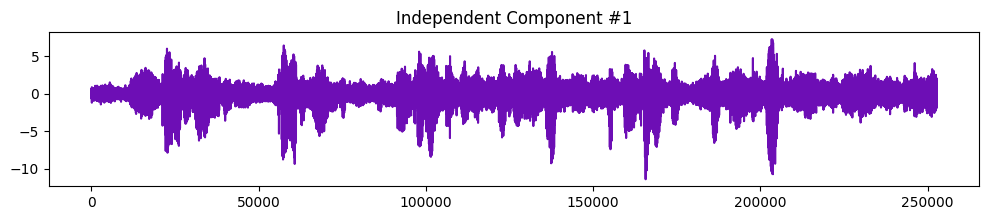

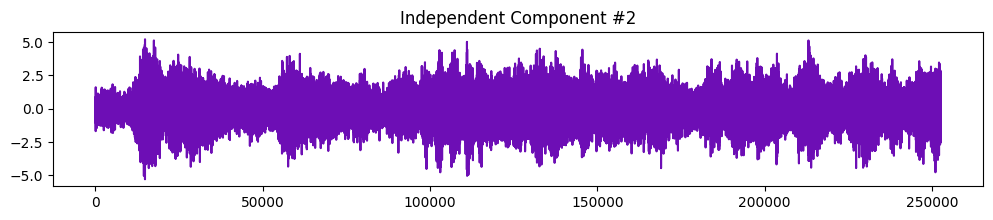

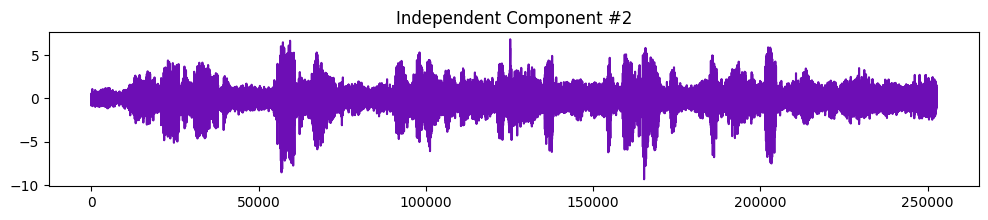

In [8]:
# Plot Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#6d0eb5")

plt.show()

# Plot Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#6d0eb5")

plt.show()

# Plot Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_3, c="#6d0eb5")

plt.show()

In [6]:
Audio(data=result_signal_1, rate=sr)

In [7]:
Audio(data=result_signal_2, rate=sr)

In [ ]:
Audio(data=result_signal_3, rate=sr)

In [ ]:
from scipy.io import wavfile

# Convert to int, map the appropriate range, and increase the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)

# Write wave files
wavfile.write("/content/result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("/content/result_signal_2.wav", fs, result_signal_2_int)
wavfile.write("/content/result_signal_3.wav", fs, result_signal_3_int)

In [ ]:
x5, sr5 = librosa.load('/content/result_signal_1.wav')

S, phase = librosa.magphase(librosa.stft(x5))
rms = librosa.feature.rms(S=S)

fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')